# This is a script to shift and combined images for the 16 positions of the rotor of MOPTOP

In [2]:
from photometry import Photometry
import os
import pandas as pd
from scripts.tools import sort_files
import matplotlib.pyplot as plt
from copy import copy
import astropy.io.fits as fits

star_name = "GRB 230818A"
experiment = "all data"
_set = "first"

max_box_size = 20
src_path = os.path.join(
    "..",
    "Pol charact MOPTOP",
    "Scientific objects",
    star_name,
    experiment,
    f"{_set} set",
    star_name,
)


objects = {
    "name": ["object"],
    "ra": ["19:03:31.4215"],
    "dec": ["+40:53:36.070"],
}
coords = {
    "run_num": [],
    "exp_num": [],
    "cam3_x": [],
    "cam3_y": [],
    "cam4_x": [],
    "cam4_y": [],
}
objects = pd.DataFrame.from_dict(objects)

for cam in [3, 4]:
    image_list = sort_files(src_path, f"{cam}_e")
    for file in image_list:
        file_path = os.path.join(src_path, file)
        hdr = fits.getheader(file_path)
        phot = Photometry(file_path, objects, max_box_size)
        phot.reset_object_coords()
        obj = phot.obj_list[0]
        coords[f"cam{cam}_x"].append(obj.xcoord)
        coords[f"cam{cam}_y"].append(obj.ycoord)
        if cam == 3:
            hdr = fits.getheader(file_path)
            coords["run_num"].append(hdr["RUNNUM"])
            coords["exp_num"].append(hdr["EXPNUM"])


df = pd.DataFrame.from_dict(coords)
csv_file = os.path.join(src_path, "..", "shifts", f"star_coords.csv")
df.sort_values(by=["run_num"])
df.to_csv(csv_file, index=False)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 60174.979820 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.979878 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.979936 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.979994 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980052 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980110 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980168 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980225 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980283 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980341 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980399 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980457 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980515 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980572 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980630 from DATE-END'. [astropy.wcs.wcs]
Se

# CCD frame after the shift

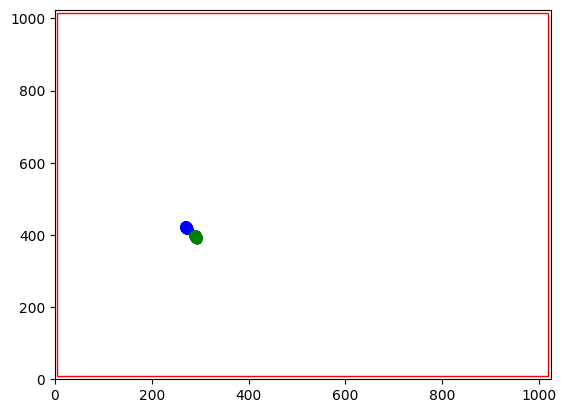

In [3]:
import numpy as np
import matplotlib.patches as patches

file_path = os.path.join(src_path, "..", "shifts", "star_coords.csv")
df = pd.read_csv(file_path)
x, y = df["cam3_x"], df["cam3_y"]
max_var_x = np.max(np.abs(x - x[0]))
max_var_y = np.max(np.abs(y - y[0]))

fig, ax = plt.subplots()
rect = patches.Rectangle(
    (max_var_x, max_var_y),
    1024 - 2 * max_var_x,
    1024 - 2 * max_var_y,
    linewidth=1,
    edgecolor="r",
    facecolor="none",
)
ax.add_patch(rect)
plt.plot(x, y, "bo")
x, y = df["cam4_x"], df["cam4_y"]
plt.plot(x, y, "go")
plt.xlim(0, 1024)
plt.ylim(0, 1024)
plt.show()
plt.show()

# Combine images using shifts

In [3]:
from fits_files import FITS_files_manager
import os

star_name = "GRB 230818A"
experiment = "all data"
_set = "first"

src_path = os.path.join(
    "..",
    "Pol charact MOPTOP",
    "Scientific objects",
    star_name,
    experiment,
    f"{_set} set",
    star_name,
)


ffiles = FITS_files_manager(src_path)
shifts_file = os.path.join(src_path, "..", "shifts", "star_coords.csv")
dest_path = os.path.join(src_path, "..", "combined images")

ffiles.combine_images_by_run(dest_path, shifts_file)